In [1]:
import numpy as np
import pandas as pd

CB513
CB513 is a benchmark dataset widely used in bioinformatics for evaluating protein secondary structure prediction models. It consists of 513 non-redundant protein chains with DSSP3 and DSS8 labels
Secondary structure: often Q3 (C, H, E) or Q8 classes (H, B, E, G, I, T, S, +)

In [ ]:
# upload the csv file
df1 = pd.read_csv('cb513.csv')

# drop unnecessary columns
df1= df1.drop(columns=['dssp3','disorder','cb513_mask'])

### Remove Unequal-Length Rows from Existing CSV
df = df1[df1['input'].str.len() == df1['dssp8'].str.len()]

removed = len(df1) - len(df)
print(f"Cleaned DataFrame created. Removed {removed} mismatched entries.")

df.head()

Cleaned DataFrame created. Removed 0 mismatched entries.


,input,dssp8
0,RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMD...,CCCTTCCGGGSCCCCBCHHHHTTTTCSCCBHHHHHHHHHHTHHHHH...
1,GKITFYEDRGFQGRHYECSSDHSNLQPYFSRCNSIRVDSGCWMLYE...,CEEEEEEETTTEEEEEEECSCBSCCTTTCSCCSEEEEEESEEEEES...
2,MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...,CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHH...
3,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,CCEEEEECCSSCCSSCEEEEEEESCCSEEEEEEECEETTEECCCTT...
4,TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...,CCSCCSCEEEEEEEGGGSCCHHHHHHHHHHHTCCCSCSSHHHHHHH...


In [3]:
# Extract the 'input' column as a string
input_sequences = df['input'].astype(str).to_list()
input_sequences_string = (input_sequences)
primary = input_sequences_string

In [4]:
##AS LIST FOR PRIMARY AMINOACID SEQUENCE
print(primary)
print(len(primary))
## AS STRING
sequence = ', '.join(primary)
print(sequence)
print(len(sequence))

['RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMDRYKTIIKKVGEKLCVEPAVIAGIISRESHAGKVLKNGWGDRGNGFGLMQVDKRSHKPQGTWNGEVHITQGTTILINFIKTIQKKFPSWTKDQQLKGGISAYNAGAGNVRSYARMDIGTTHDDYANDVVARAQYYKQHGY', 'GKITFYEDRGFQGRHYECSSDHSNLQPYFSRCNSIRVDSGCWMLYEQPNFQGPQYFLRRGDYPDYQQWMGLNDSIRSCRLIPHTGSHRLRIYEREDYRGQMVEITEDCSSLHDRFHFSEIHSFNVLEGWWVLYEMTNYRGRQYLLRPGDYRRYHDWGATNARVGSLRRAVDFY', 'MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDEKIAELLTKLGRDTQIGLTMPQVFAPDGSHIGGFDQLREYFK', 'APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPATATSFTTDASGAASFSFTVRKSYAGQTPSGTPVGSVDCATDACNLGAGNSGLNLGHVALTFG', 'TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNIIGMDKPLSLPGFLAKFDYYMPVIAGCREAIKRIAYEFVEMKAKEGVVYVEVRYSPHLLANSKVDPMPWNQTEGDVTPDDVVDLVNQGLQEGEQAFGIKVRSILCCMRHQPSWSLEVLELCKKYNQKTVVAMDLAGDETIEGSSLFPGHVEAYEGAVKNGIHRTVHAGEVGSPEVVREAVDILKTERVGHGYHTIEDEALYNRLLKENMHFEVCPWSSYLTGAWDPKTTHAVVRFKNDKANYSLNTDDPLIFKSTLDTDYQMTKKDMGFTEEEFKRLNINAAKSSFLPEEEKKELLERLYREYQ', 'GNNVVVLGTQWGDEGKGKIVDLLTERAKYVVRYQGGHNAGHTLVINGEKTVLHLIPSGILRENVTSIIGNGVVLSP

In [5]:
# Extract the 'dssp8' column as a string
dssp8_sequences = df['dssp8'].astype(str).to_list()
dssp8_sequences_string = (dssp8_sequences)
dssp8_structure = dssp8_sequences_string

In [6]:
##AS LIST FOR DSSP8
print(dssp8_structure)
print(len(dssp8_structure))
## AS STRING
dssp8 = ', '.join(dssp8_structure)
print(dssp8)
print(len(dssp8))

['CCCTTCCGGGSCCCCBCHHHHTTTTCSCCBHHHHHHHHHHTHHHHHTTHHHHHHHHHHHTSCHHHHHHHHHHHHGGGTTCBTTBCTTSCEETTTTEETTTSCCCSCTTSHHHHHHHHHHHHHHHHHHHHHCTTSCHHHHHHHHHHHHHHCGGGCCCSTTTTTTSGGGCHHHHHHHHHHHHHHTTC', 'CEEEEEEETTTEEEEEEECSCBSCCTTTCSCCSEEEEEESEEEEESSGGGCSCEEEECSEEESSTTTTTCSSSCCCEEEEECCCSCCEEEEESSGGGCSCEEEECSCBSCSTTTSSCCCCCEEEEEESCEEEESSSSSCSCEEEECSEEECSGGGGTCSSCCCCEEEECCCCC', 'CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHHHHHHHHHHHTCSCSSSCCSCEEECTTSCEEESHHHHHHHTC', 'CCEEEEECCSSCCSSCEEEEEEESCCSEEEEEEECEETTEECCCTTTCCEEECCSSCCCEEEEECCSEEEEECTTSCEEEEEETTTSCCEEEEECSSCCCCCCCCCCC', 'CCSCCSCEEEEEEEGGGSCCHHHHHHHHHHHTCCCSCSSHHHHHHHHSCSSCCCHHHHTTGGGGTHHHHTTCHHHHHHHHHHHHHHHHHTTEEEEEEEECSGGGCSSSCSSCGGGCCCCSCCHHHHHHHHHHHHHHHHHHHCCEEEEEEEEETTCTTTHHHHHHHHHHTBTTTEEEEEEESCTTSTTGGGCHHHHHHHHHHHHHTCEEEEEESSSSCHHHHHHIIIIICCSEEEECGGGGGSHHHHHHHHHTTCEEEECHHHHHHTSSSCTTSCCHHHHHHHTTCEEEECCBCHHHHTCCHHHHHHHHHHTTTCCHHHHHHHHHHHHHTSCCCHHHHHHHHHHHHHHTC', 'CCEEEEEESSSSCSCHHHHHHHHTTTCSEEEECSCCSCCCEEEEETTEEEEESSSCGGGGCTTCEEEECTTSCBCH

In [ ]:
#Standard 20 aminoacids
AMINO_ACIDS = list("ACDEFGHIKLMNPQRSTVWY")

In [8]:
#Q8 to Q3 mapping
def map_dssp_to_q3(dssp_label):
  if dssp_label in ['H', 'G', 'I']:
    return 'H'
  elif dssp_label in ['E', 'B']:
    return 'E'
  else:
    return 'C'

Simplifies DSSP-8 class labels to Q3 format:

H (Helix) ← H, G, I

E (Sheet) ← E, B

C (Coil) ← All others

Sliding Window Encoder Function
A sliding window encoder is a method that captures local context around each amino acid in a protein sequence. 
It involves creating a fixed-size window that slides over the sequence, and for each position, it encodes the amino acids within the window into a feature vector. This encoding can be done using one-hot encoding, where each amino acid is represented as a binary vector with a 1 in the position corresponding to its index in the alphabet and 0s elsewhere.

One-Hot Encoding Inside Each Window
Each amino acid in the window is converted to a one-hot vector:

21-dimensional binary vector:

20 standard amino acids

1 extra symbol for unknown/padding (like 'X')

For window size = 15 →
Total features = 15 × 21 = 315

So:

For each residue, the encoder gives a 315-dimensional vector

This becomes input to a machine learning or deep learning model

In [9]:
#Sliding window encoder
from sklearn.preprocessing import OneHotEncoder

def encode_sequence_with_labels(sequence, structure, window_size=15):
  assert len(sequence)== len(structure), "Sequence and structure length mismatch."
  pad = window_size//2
  padded_seq = "X" *pad + sequence + "X" *pad
  encoded_features = []
  labels = []

  #One hot encoder setup

  encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
  encoder.fit(np.array(AMINO_ACIDS + ['X']).reshape(-1,1))
  for i in range(len(sequence)):
    window = padded_seq[i:i+window_size]
    onehot = encoder.transform(np.array(list(window)).reshape(-1,1)).flatten()
    encoded_features.append(onehot)
    labels.append(map_dssp_to_q3(structure[i]))

  return np.array(encoded_features), np.array(labels)

In [10]:
## input for X, y should be as strings and not list

if __name__ == "__main__":
  seq = sequence
  struct = dssp8
  X, y = encode_sequence_with_labels(seq, struct)
  print("Features shape:",X.shape)
  print("Labels:",y[:5])

Features shape: (145031, 315)
Labels: ['C' 'C' 'C' 'C' 'C']


In [17]:
X.shape

(145031, 315)

In [18]:
y.shape

(145031,)

Total Features per Residue=15 positions×21 one-hot encoded dimensions=315

145,031: Number of residues in dataset.

315: Feature vector for each residue, coming from a 15-residue sliding window, each encoded as a 21-length one-hot vector.

In [11]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [12]:
# Standardize needed
scale_models = ['KNeighborsClassifier', 'LogisticRegression']

In [ ]:
# models selected
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}


==================== RandomForestClassifier ====================
RandomForestClassifier Accuracy: 76.70%
Classification Report:
               precision    recall  f1-score   support

           C       0.74      0.87      0.80     12821
           E       0.85      0.57      0.68      6384
           H       0.77      0.76      0.77      9802

    accuracy                           0.77     29007
   macro avg       0.79      0.73      0.75     29007
weighted avg       0.77      0.77      0.76     29007



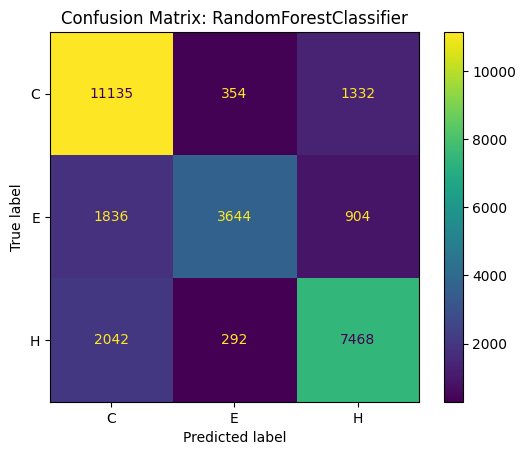


==================== KNeighborsClassifier ====================
KNeighborsClassifier Accuracy: 56.48%
Classification Report:
               precision    recall  f1-score   support

           C       0.57      0.72      0.64     12821
           E       0.48      0.35      0.41      6384
           H       0.60      0.50      0.54      9802

    accuracy                           0.56     29007
   macro avg       0.55      0.52      0.53     29007
weighted avg       0.56      0.56      0.56     29007



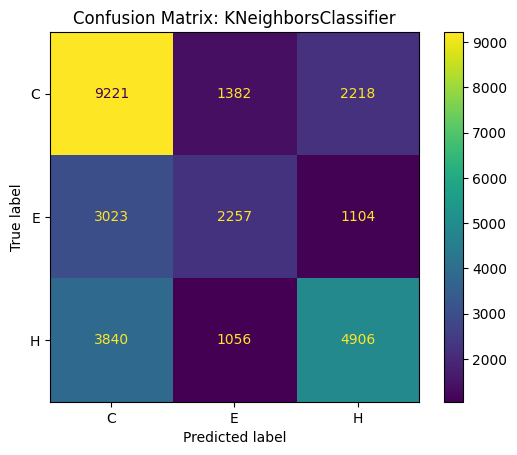


==================== LogisticRegression ====================
LogisticRegression Accuracy: 63.57%
Classification Report:
               precision    recall  f1-score   support

           C       0.67      0.73      0.70     12821
           E       0.57      0.43      0.49      6384
           H       0.62      0.64      0.63      9802

    accuracy                           0.64     29007
   macro avg       0.62      0.60      0.61     29007
weighted avg       0.63      0.64      0.63     29007



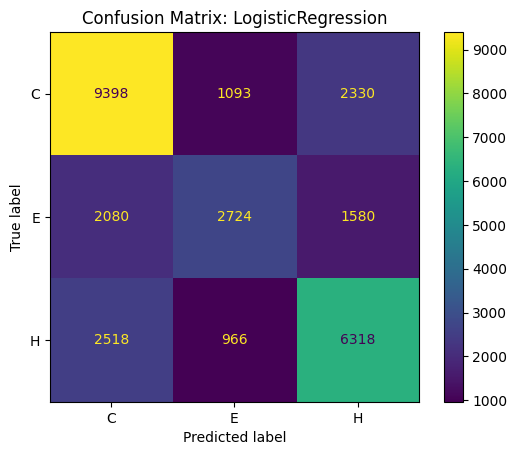

In [14]:
# Loop through models
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")


    # Scale if required
    if name in scale_models:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy*100:.2f}%")

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.viridis)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [19]:
## CNN
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, InputLayer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Reshape X from (145031, 315) to (145031, 15, 21)
X_reshaped = X.reshape(-1, 15, 21)

# Step 2: Encode y from Q3 (C, H, E) to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts C/H/E → 0/1/2
y_categorical = to_categorical(y_encoded, num_classes=3)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# Step 4: Define the CNN model
model = Sequential([
    InputLayer(input_shape=(15, 21)),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes: C, H, E
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Step 6: Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.



Epoch 1/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5548 - loss: 0.9322 - val_accuracy: 0.6447 - val_loss: 0.8093
Epoch 2/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6412 - loss: 0.8130 - val_accuracy: 0.6596 - val_loss: 0.7705
Epoch 3/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6580 - loss: 0.7857 - val_accuracy: 0.6717 - val_loss: 0.7557
Epoch 4/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6649 - loss: 0.7695 - val_accuracy: 0.6798 - val_loss: 0.7434
Epoch 5/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6725 - loss: 0.7570 - val_accuracy: 0.6813 - val_loss: 0.7354
Epoch 6/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6764 - loss: 0.7478 - val_accuracy: 0.6863 - val_loss: 0.7331
Epoch 7/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6819 - loss: 0.7396 - val_accuracy: 0.6878 - val_loss: 0.7231
Epoch 8/10
816/816 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6828 - loss: 0.7347 - val_accur

907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

           C       0.68      0.79      0.73     12732
           E       0.65      0.52      0.58      6436
           H       0.76      0.69      0.72      9839

    accuracy                           0.70     29007
   macro avg       0.70      0.67      0.68     29007
weighted avg       0.70      0.70      0.69     29007



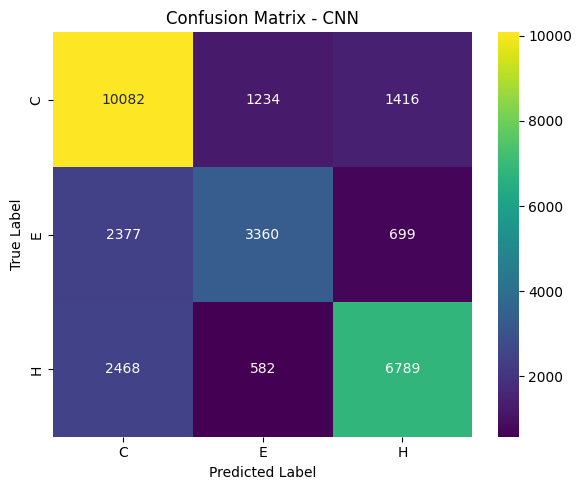

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict class probabilities and get class labels
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 2. Classification Report
print("Classification Report (CNN):")
print(classification_report(y_true_classes, y_pred_classes, target_names=['C', 'E', 'H']))

# 3. Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 4. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['C', 'E', 'H'], yticklabels=['C', 'E', 'H'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN')
plt.tight_layout()
plt.show()


In [23]:
# ROC plot  (One vs rest) curves
import plotly.graph_objects as go

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer


X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lb = LabelBinarizer()
y_train_ml_bin = lb.fit_transform(y_train_ml)
y_test_ml_bin = lb.transform(y_test_ml)
class_names = lb.classes_  # ['C', 'E', 'H']


models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

probs_dict = {}

for name, clf in models.items():

    clf.fit(X_train_ml, y_train_ml)
    y_score = clf.predict_proba(X_test_ml)
    probs_dict[name] = y_score

try:
    cnn_probs = model.predict(X_test)  # shape: (n_samples, 3)
    probs_dict['CNN'] = cnn_probs

    y_test_cnn_bin = y_test
except NameError:
    print("CNN model or its test data not found. Skipping CNN in ROC plot.")

fig = go.Figure()

colors = {'C': 'blue', 'E': 'green', 'H': 'red'}

for model_name, probs in probs_dict.items():

    if model_name == 'CNN':
        current_y_test_bin = y_test_cnn_bin
    else:
        current_y_test_bin = y_test_ml_bin

    for i, class_label in enumerate(class_names):
        fpr, tpr, _ = roc_curve(current_y_test_bin[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        fig.add_trace(go.Scatter(x=fpr, y=tpr,
                                 mode='lines',
                                 name=f'{model_name} - {class_label} (AUC={roc_auc:.2f})',
                                 line=dict(dash='solid' if model_name != 'CNN' else 'dash'),
                                 hovertemplate=f'Model: {model_name}<br>Class: {class_label}<br>FPR: %{{x:.2f}}<br>TPR: %{{y:.2f}}<extra></extra>',
                                 line_color=colors[class_label]))


fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines', name='Random Chance',
                         line=dict(dash='dot', color='black')))


fig.update_layout(title='Multi-Class ROC Curve (One-vs-Rest)',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  width=800,
                  height=600,
                  legend=dict(x=1.05, y=1),
                  template='plotly_white')

fig.show()

907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Model': ['LogisticRegression', 'KNeighbors', 'Random Forest', 'CNN'],
    'Accuracy': [63.57, 56.48, 76.60, 69.75]
}

df = pd.DataFrame(data)

# Create bar chart
fig = px.bar(df, x='Model', y='Accuracy', text='Accuracy',
             title='Model Accuracy Comparison',
             labels={'Accuracy': 'Accuracy (%)'},
             color='Model')  # Optional: color by model

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis_range=[0, 100])  # Set y-axis range

fig.show()